# Recovering time-independent Hamiltonian from the wavefunction as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from split_op_schrodinger1D import SplitOpSchrodinger1D
from imag_time_propagation import ImgTimePropagation
from recovering_hamiltonian import RecoverHamiltonian

In [2]:
# Changing the default size of all the figures 
plt.rcParams['figure.figsize'] = [15, 8]

# Use the evolution generated by the time-independent Hamiltonian as input

## propagate to get the input

In [3]:
# parameters of the quantum system to be studied
@njit
def v(x, t=0.):
    """
    Potential energy
    """
    return 0.02 * x ** 4
    
@njit
def k(p, t=0.):
    """
    Non-relativistic kinetic energy
    """
    return 0.5 * p ** 2

quant_sys_params = dict(
    dt = 0.008,
    x_grid_dim=512,
    x_amplitude=10.,
    k=k,
    v=v,
)

In [4]:
# initialize the propagator
quant_sys = SplitOpSchrodinger1D(**quant_sys_params)

# set the initial condition that is not an eigenstate
quant_sys.set_wavefunction(
    lambda x: np.exp(-0.4 * (x + 2.5) ** 2)
)

# Save the evolution
wavefunctions = [quant_sys.propagate().copy() for _ in range(10000)]
wavefunctions = np.array(wavefunctions)



## Reconstruct Hamiltonian

In [5]:
reconstructed_h = RecoverHamiltonian(wavefunctions, dt=quant_sys.dt)
times = quant_sys.dt * np.arange(len(wavefunctions))
reconstructed_wavefunctions = reconstructed_h.propagate(times)

In [6]:
reconstructed_h.weight.max()

1.0

In [7]:
indx = np.nonzero(reconstructed_h.weight > 1e-3)

(-6.0, 60.0)

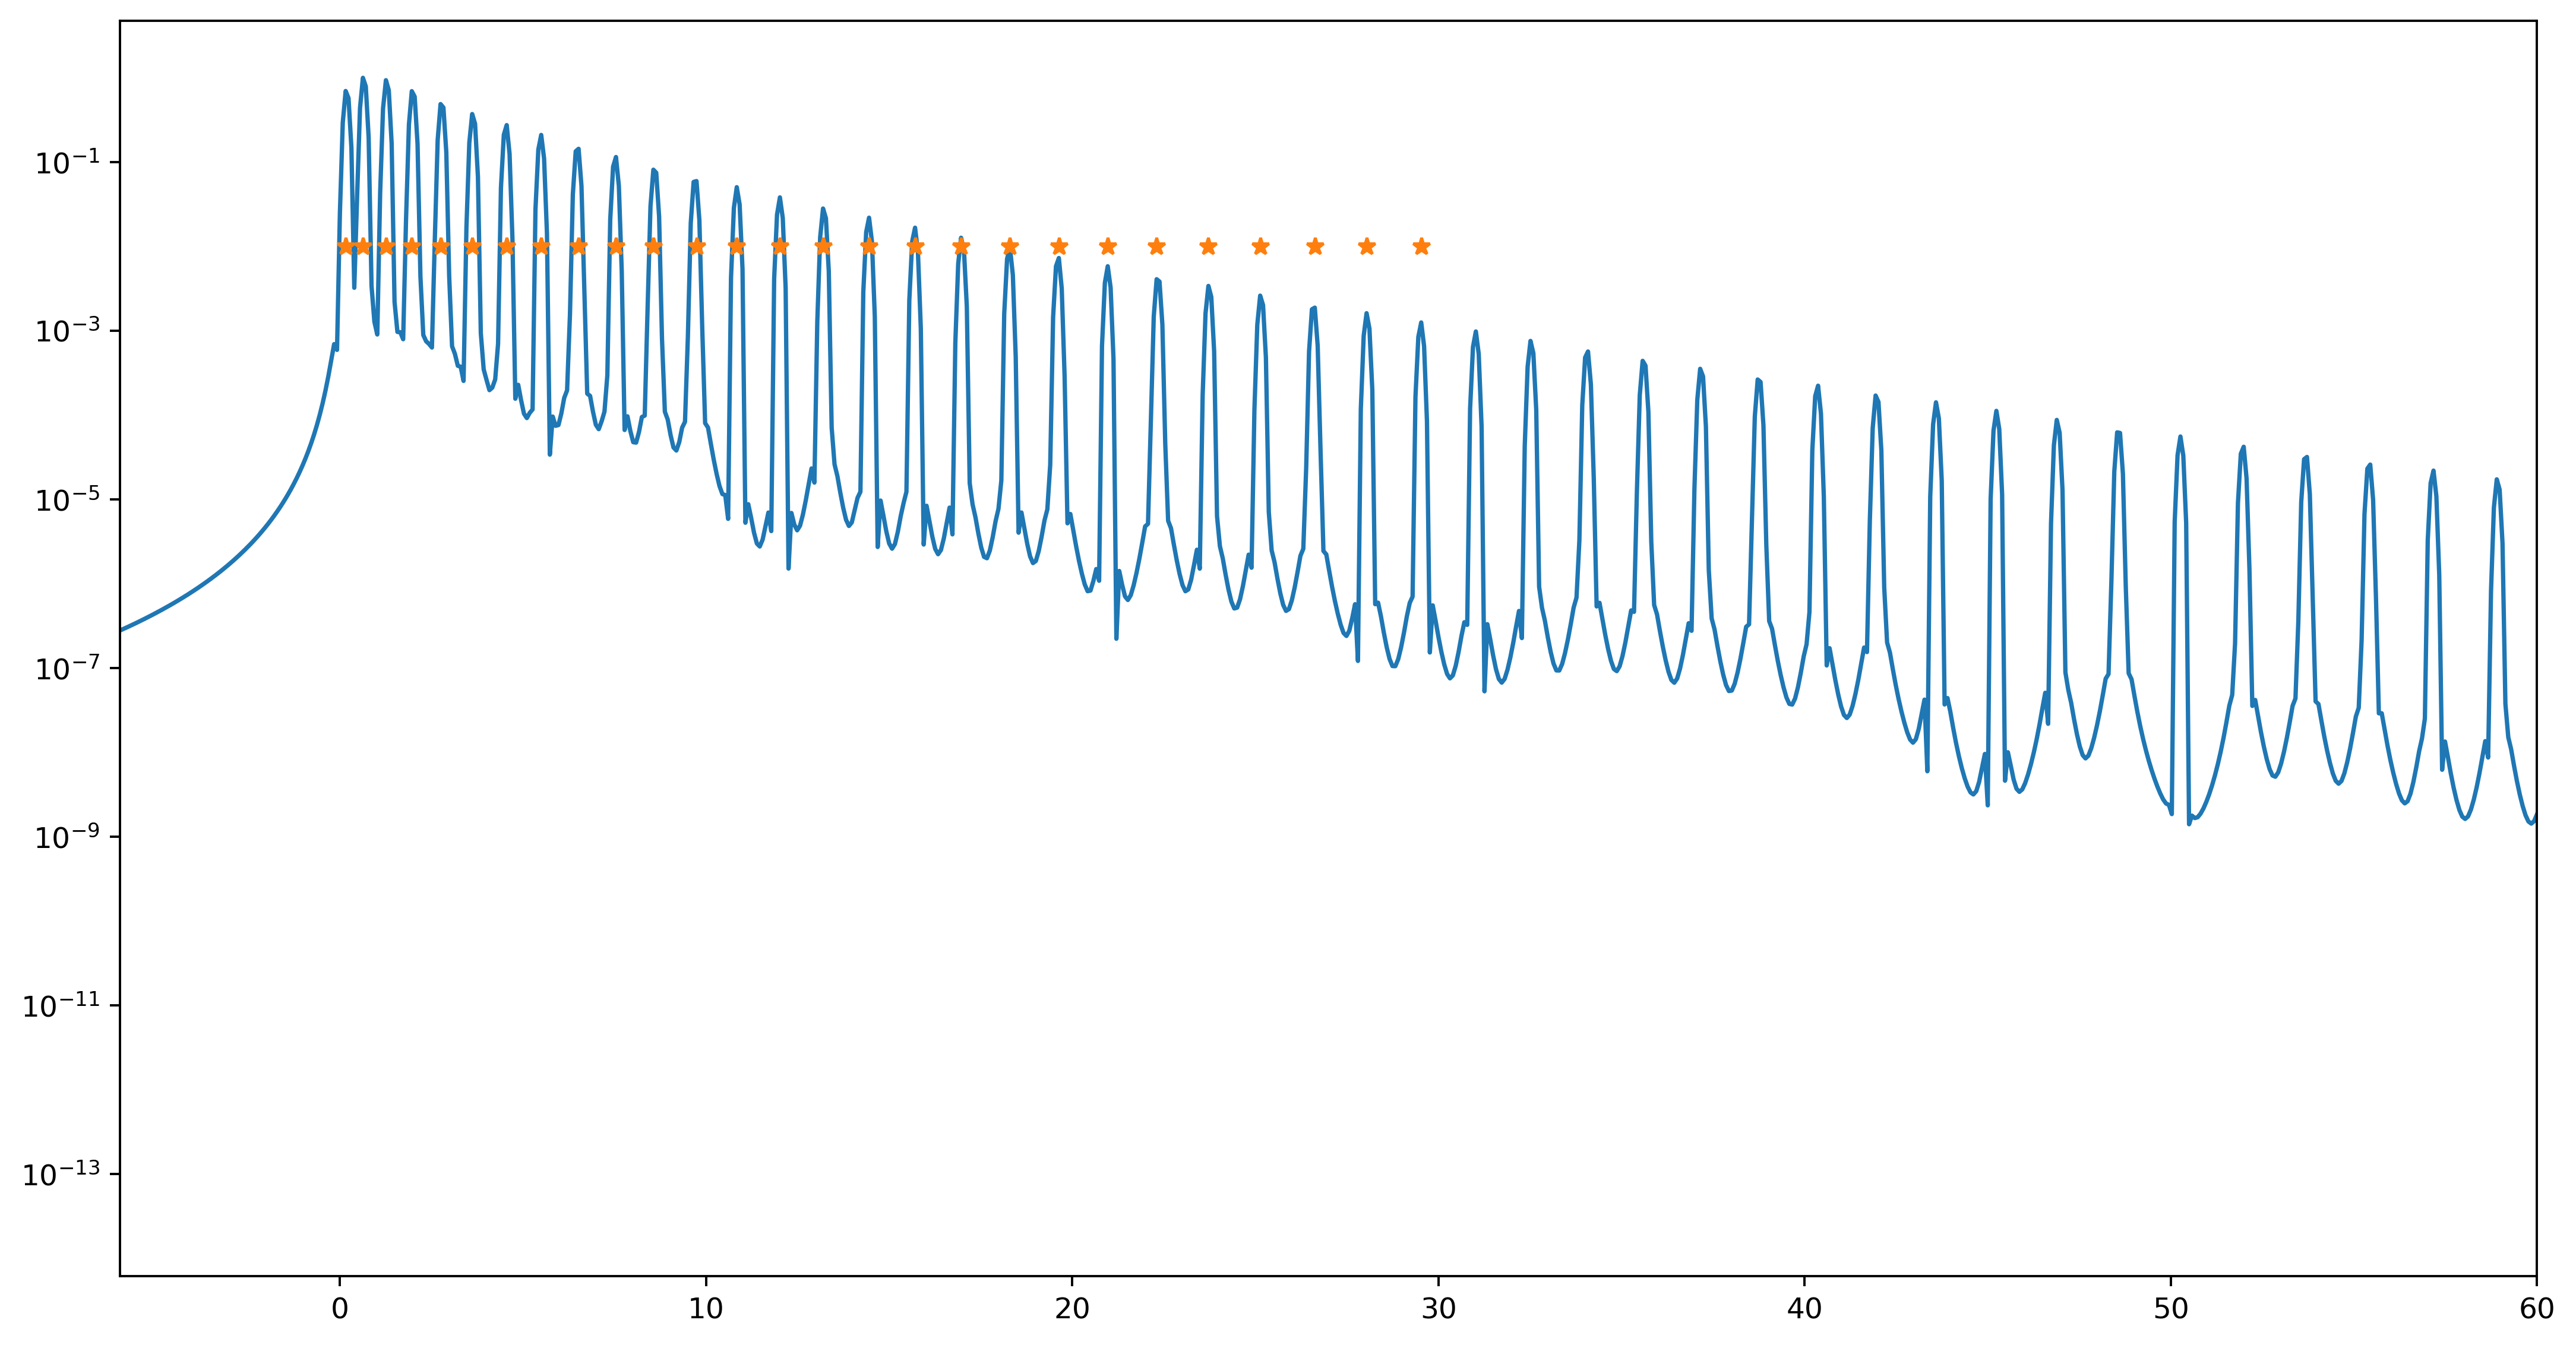

In [8]:
plt.figure(dpi=350)
plt.semilogy(reconstructed_h.energy_range, reconstructed_h.weight)
plt.semilogy(reconstructed_h.energies, 1e-2 * np.ones(reconstructed_h.energies.size), '*')#reconstructed_h.weight[indx], '*')
plt.xlim(-6, 60)

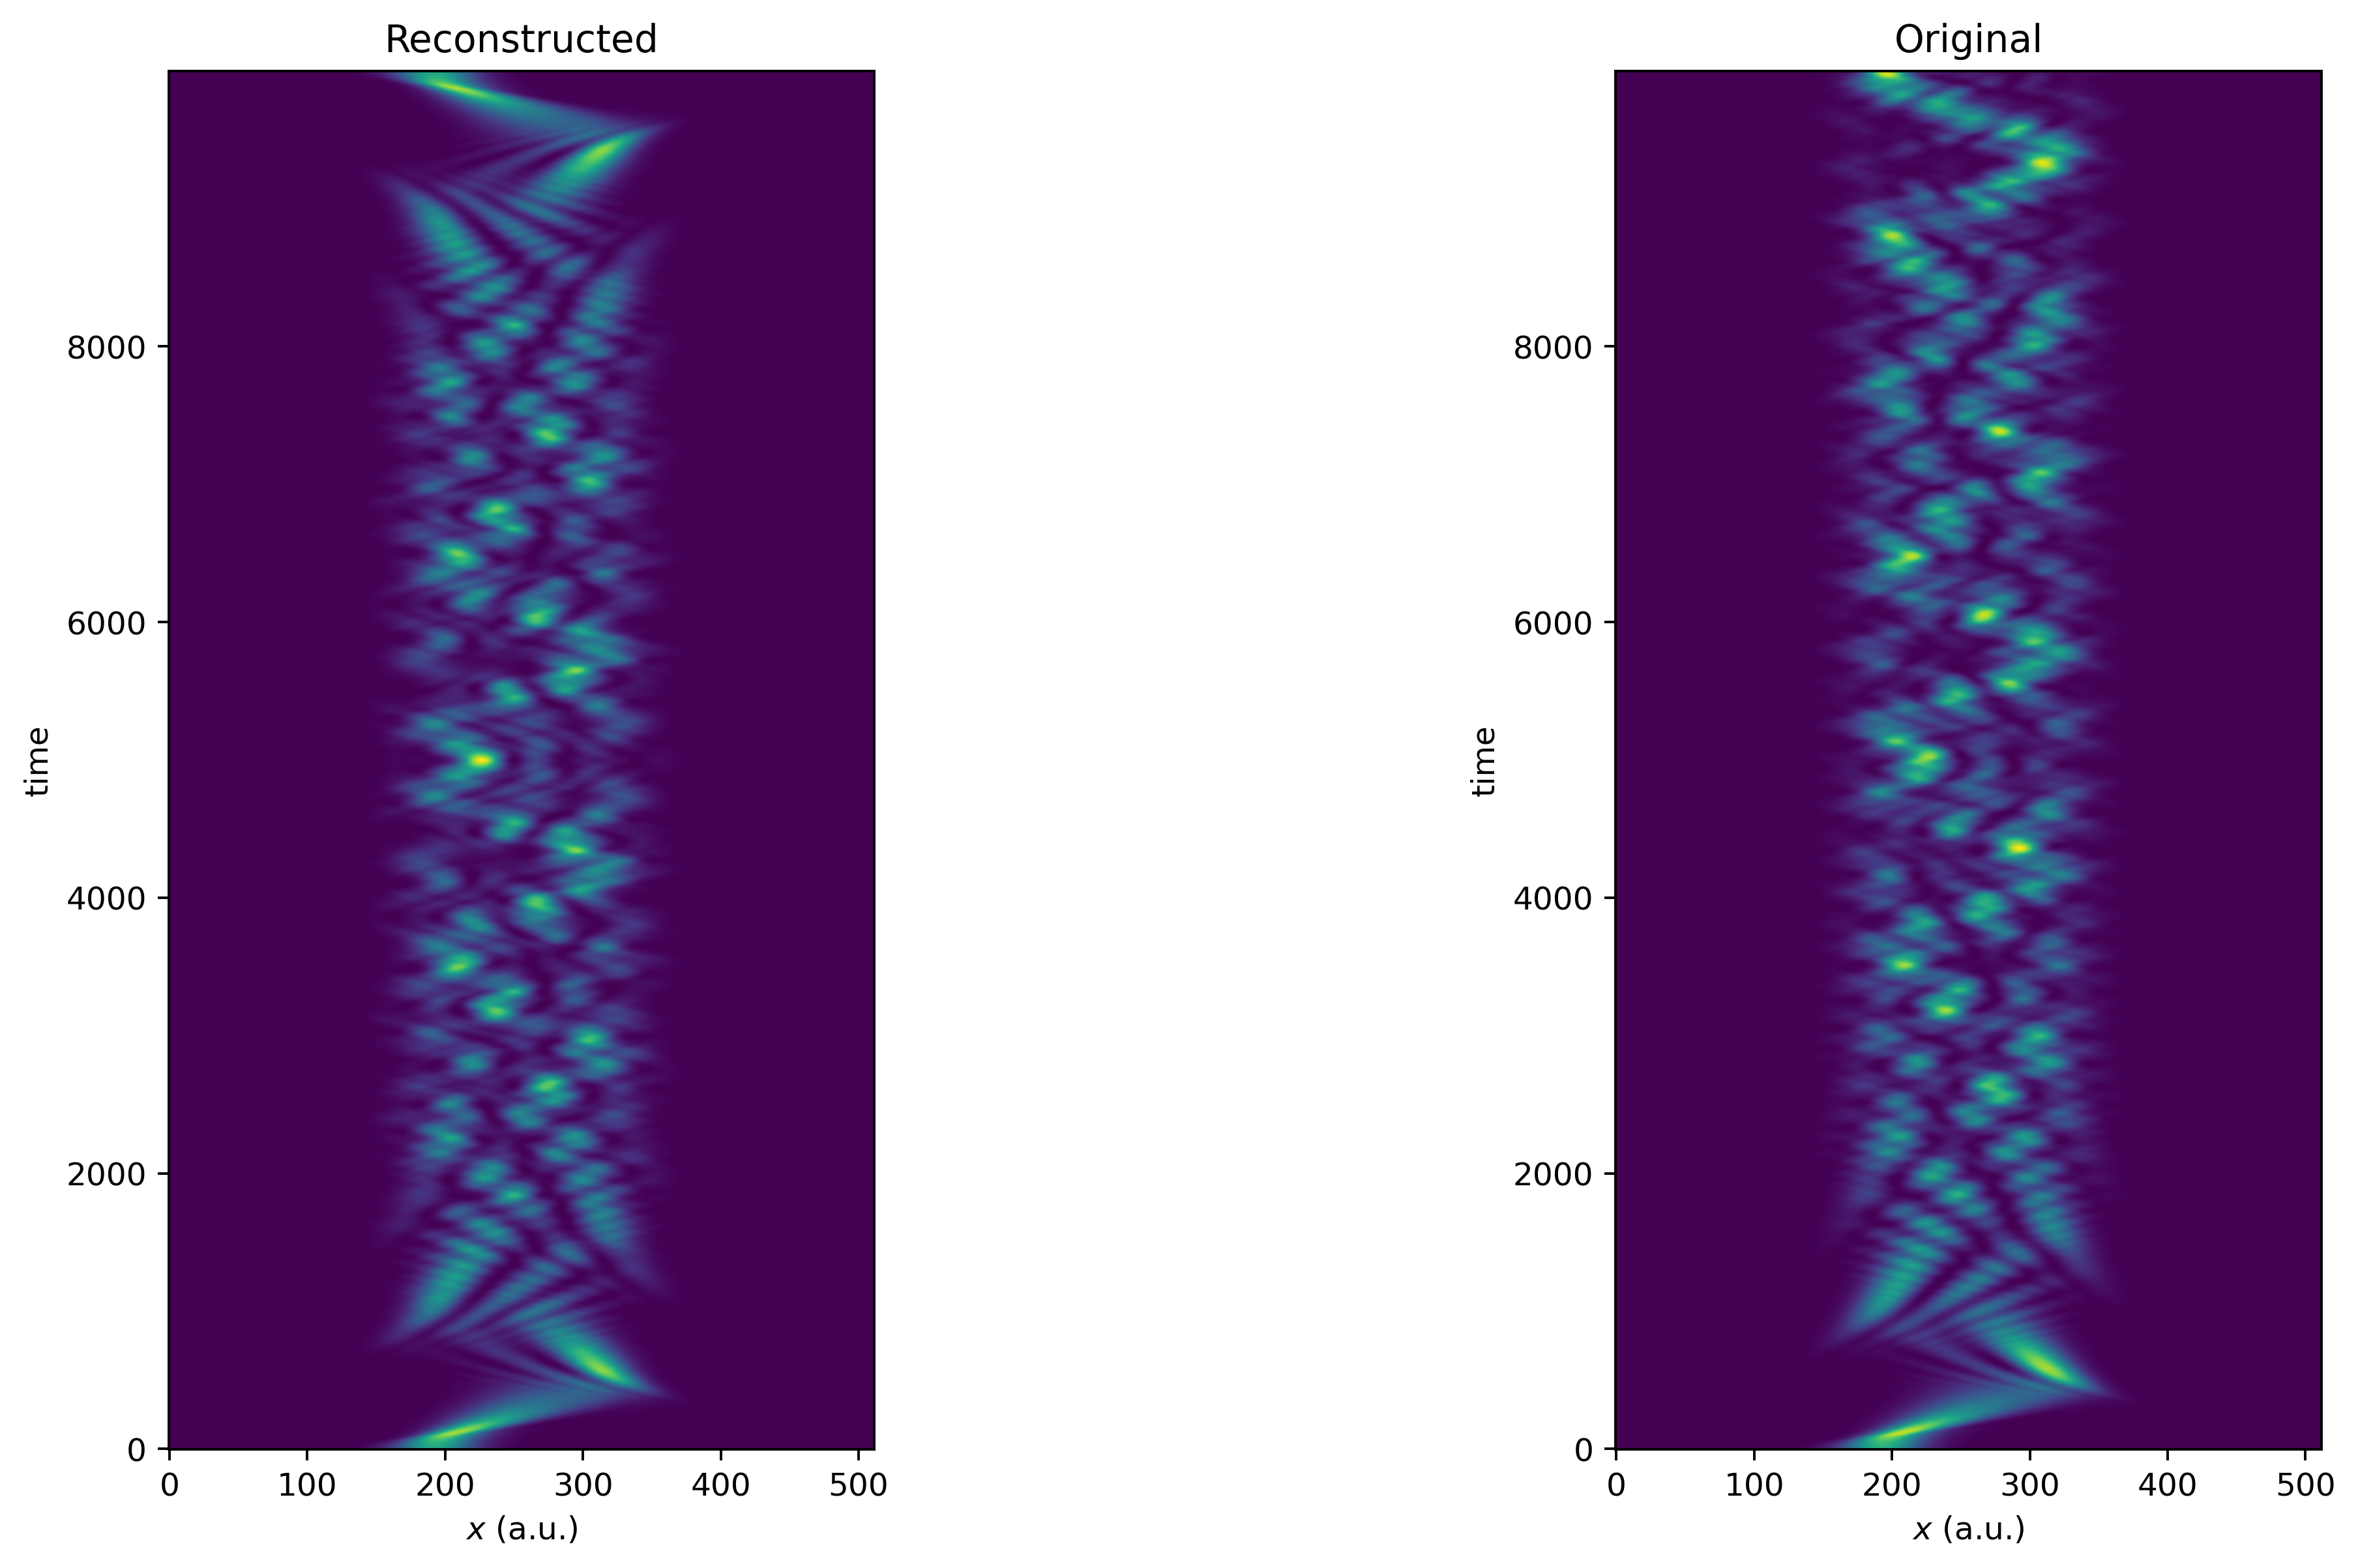

In [9]:
plt.figure(dpi=350)
plt.subplot(121)

plt.title('Reconstructed')
plt.imshow(np.abs(reconstructed_wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.subplot(122)
plt.title('Original')
plt.imshow(np.abs(wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.show()

In [10]:
reconstructed_h.energies

array([ 0.15707963,  0.62831853,  1.25663706,  1.96349541,  2.74889357,
        3.61283155,  4.55530935,  5.49778714,  6.51880476,  7.53982237,
        8.56083998,  9.73893723, 10.83849465, 12.0165919 , 13.19468915,
       14.45132621, 15.70796327, 16.96460033, 18.29977721, 19.63495408,
       20.97013096, 22.30530784, 23.71902453, 25.13274123, 26.62499774,
       28.03871443, 29.53097094])

# Use the evolution generated by the time-independent Hamiltonian as input

## propagate to get the input

In [22]:
# parameters of the quantum system to be studied

# the number of time steps
num_time_steps = 10000
dt = 0.008

@njit
def v(x, t=0.):
    """
    Potential energy
    """
    return 0.02 * x ** 4 + 0.1 * x * np.sin(2 * np.pi * t / (0.25 * num_time_steps * dt))
    #return 0.01 * (1. - 0.95 / (1. + np.exp(-0.5 * t))) * x ** 4

@njit
def k(p, t=0.):
    """
    Non-relativistic kinetic energy
    """
    return 0.5 * p ** 2

quant_sys_params = dict(
    dt = dt,
    x_grid_dim=512,
    x_amplitude=10.,
    k=k,
    v=v,
)

In [23]:
# initialize the propagator
quant_sys = ImgTimePropagation(**quant_sys_params)

# set the initial condition that is the grorund state
quant_sys.set_wavefunction(
    quant_sys.get_stationary_states(1).stationary_states[0]
)

# Save the evolution
wavefunctions = [quant_sys.propagate().copy() for _ in range(num_time_steps)]
wavefunctions = np.array(wavefunctions)

times = quant_sys.dt * np.arange(num_time_steps)

## Reconstruct Hamiltonian

In [24]:
reconstructed_h = RecoverHamiltonian(wavefunctions, dt=quant_sys.dt, threshold=1e-9,)
reconstructed_wavefunctions = reconstructed_h.propagate(times)

(-10.0, 10.0)

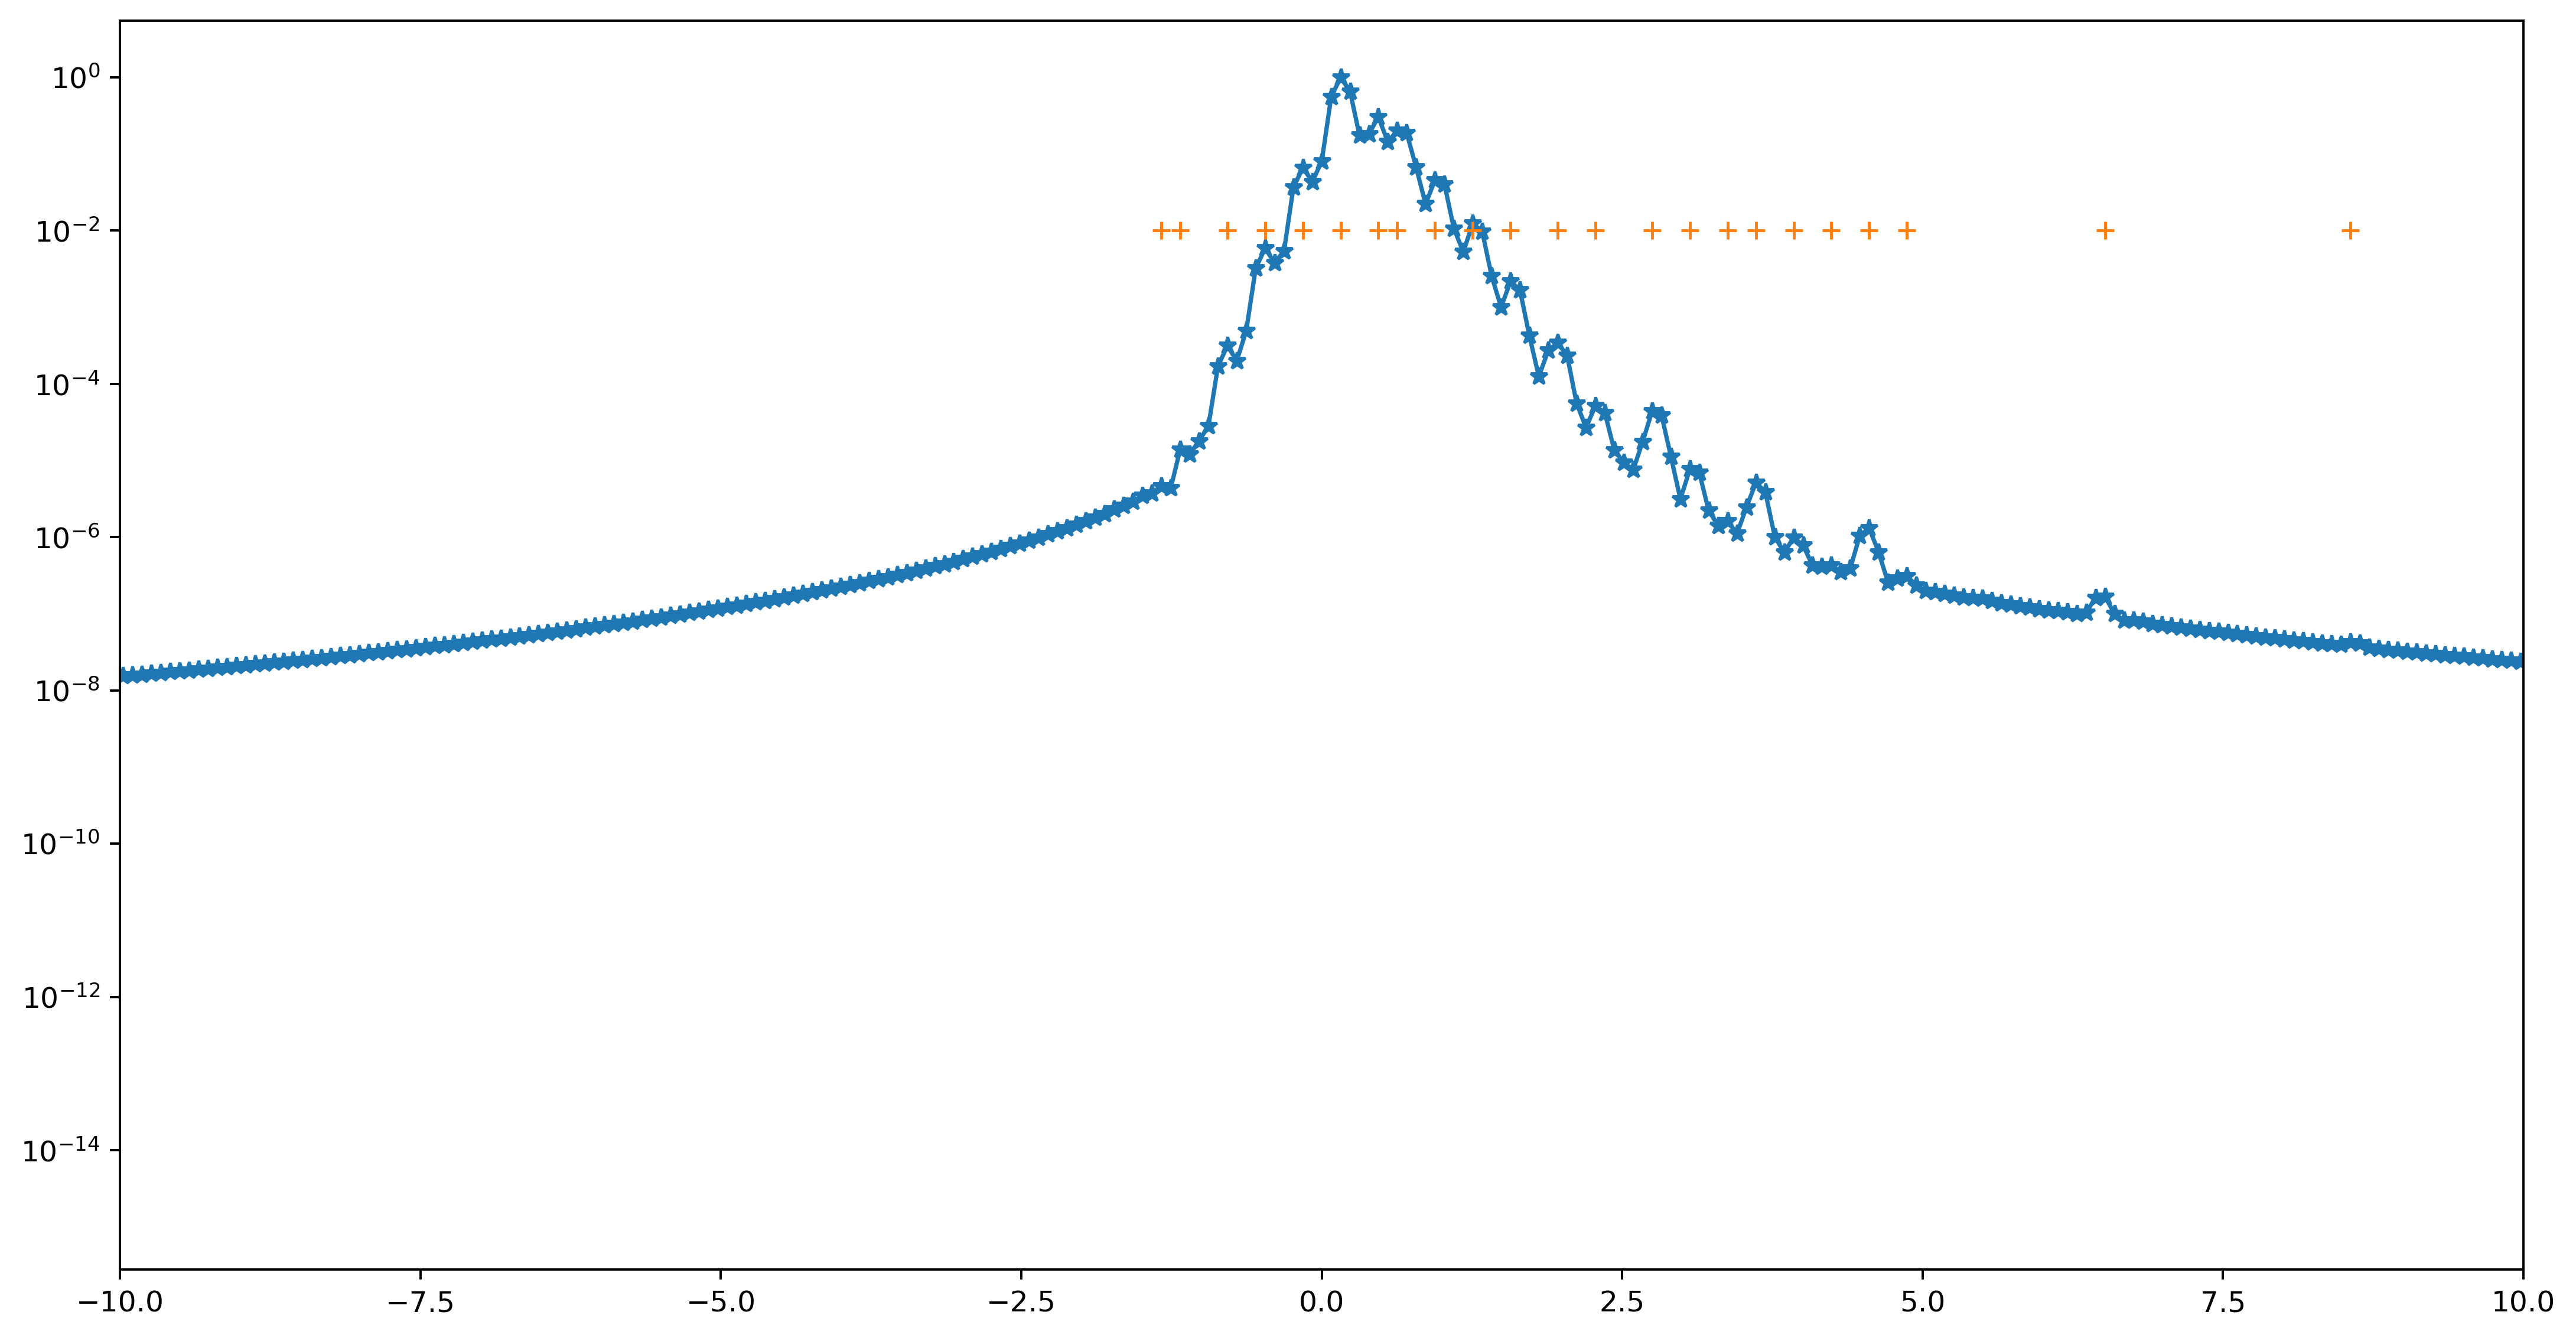

In [25]:
#indx = np.nonzero(reconstructed_h.weight > 1e-3)
from scipy.signal import find_peaks
indx,_ = find_peaks(reconstructed_h.weight, 1e-3)

plt.figure(dpi=350)
plt.semilogy(reconstructed_h.energy_range, reconstructed_h.weight, '*-')
plt.semilogy(reconstructed_h.energies, 1e-2 * np.ones(reconstructed_h.energies.size), '+')
plt.xlim(-10, 10)

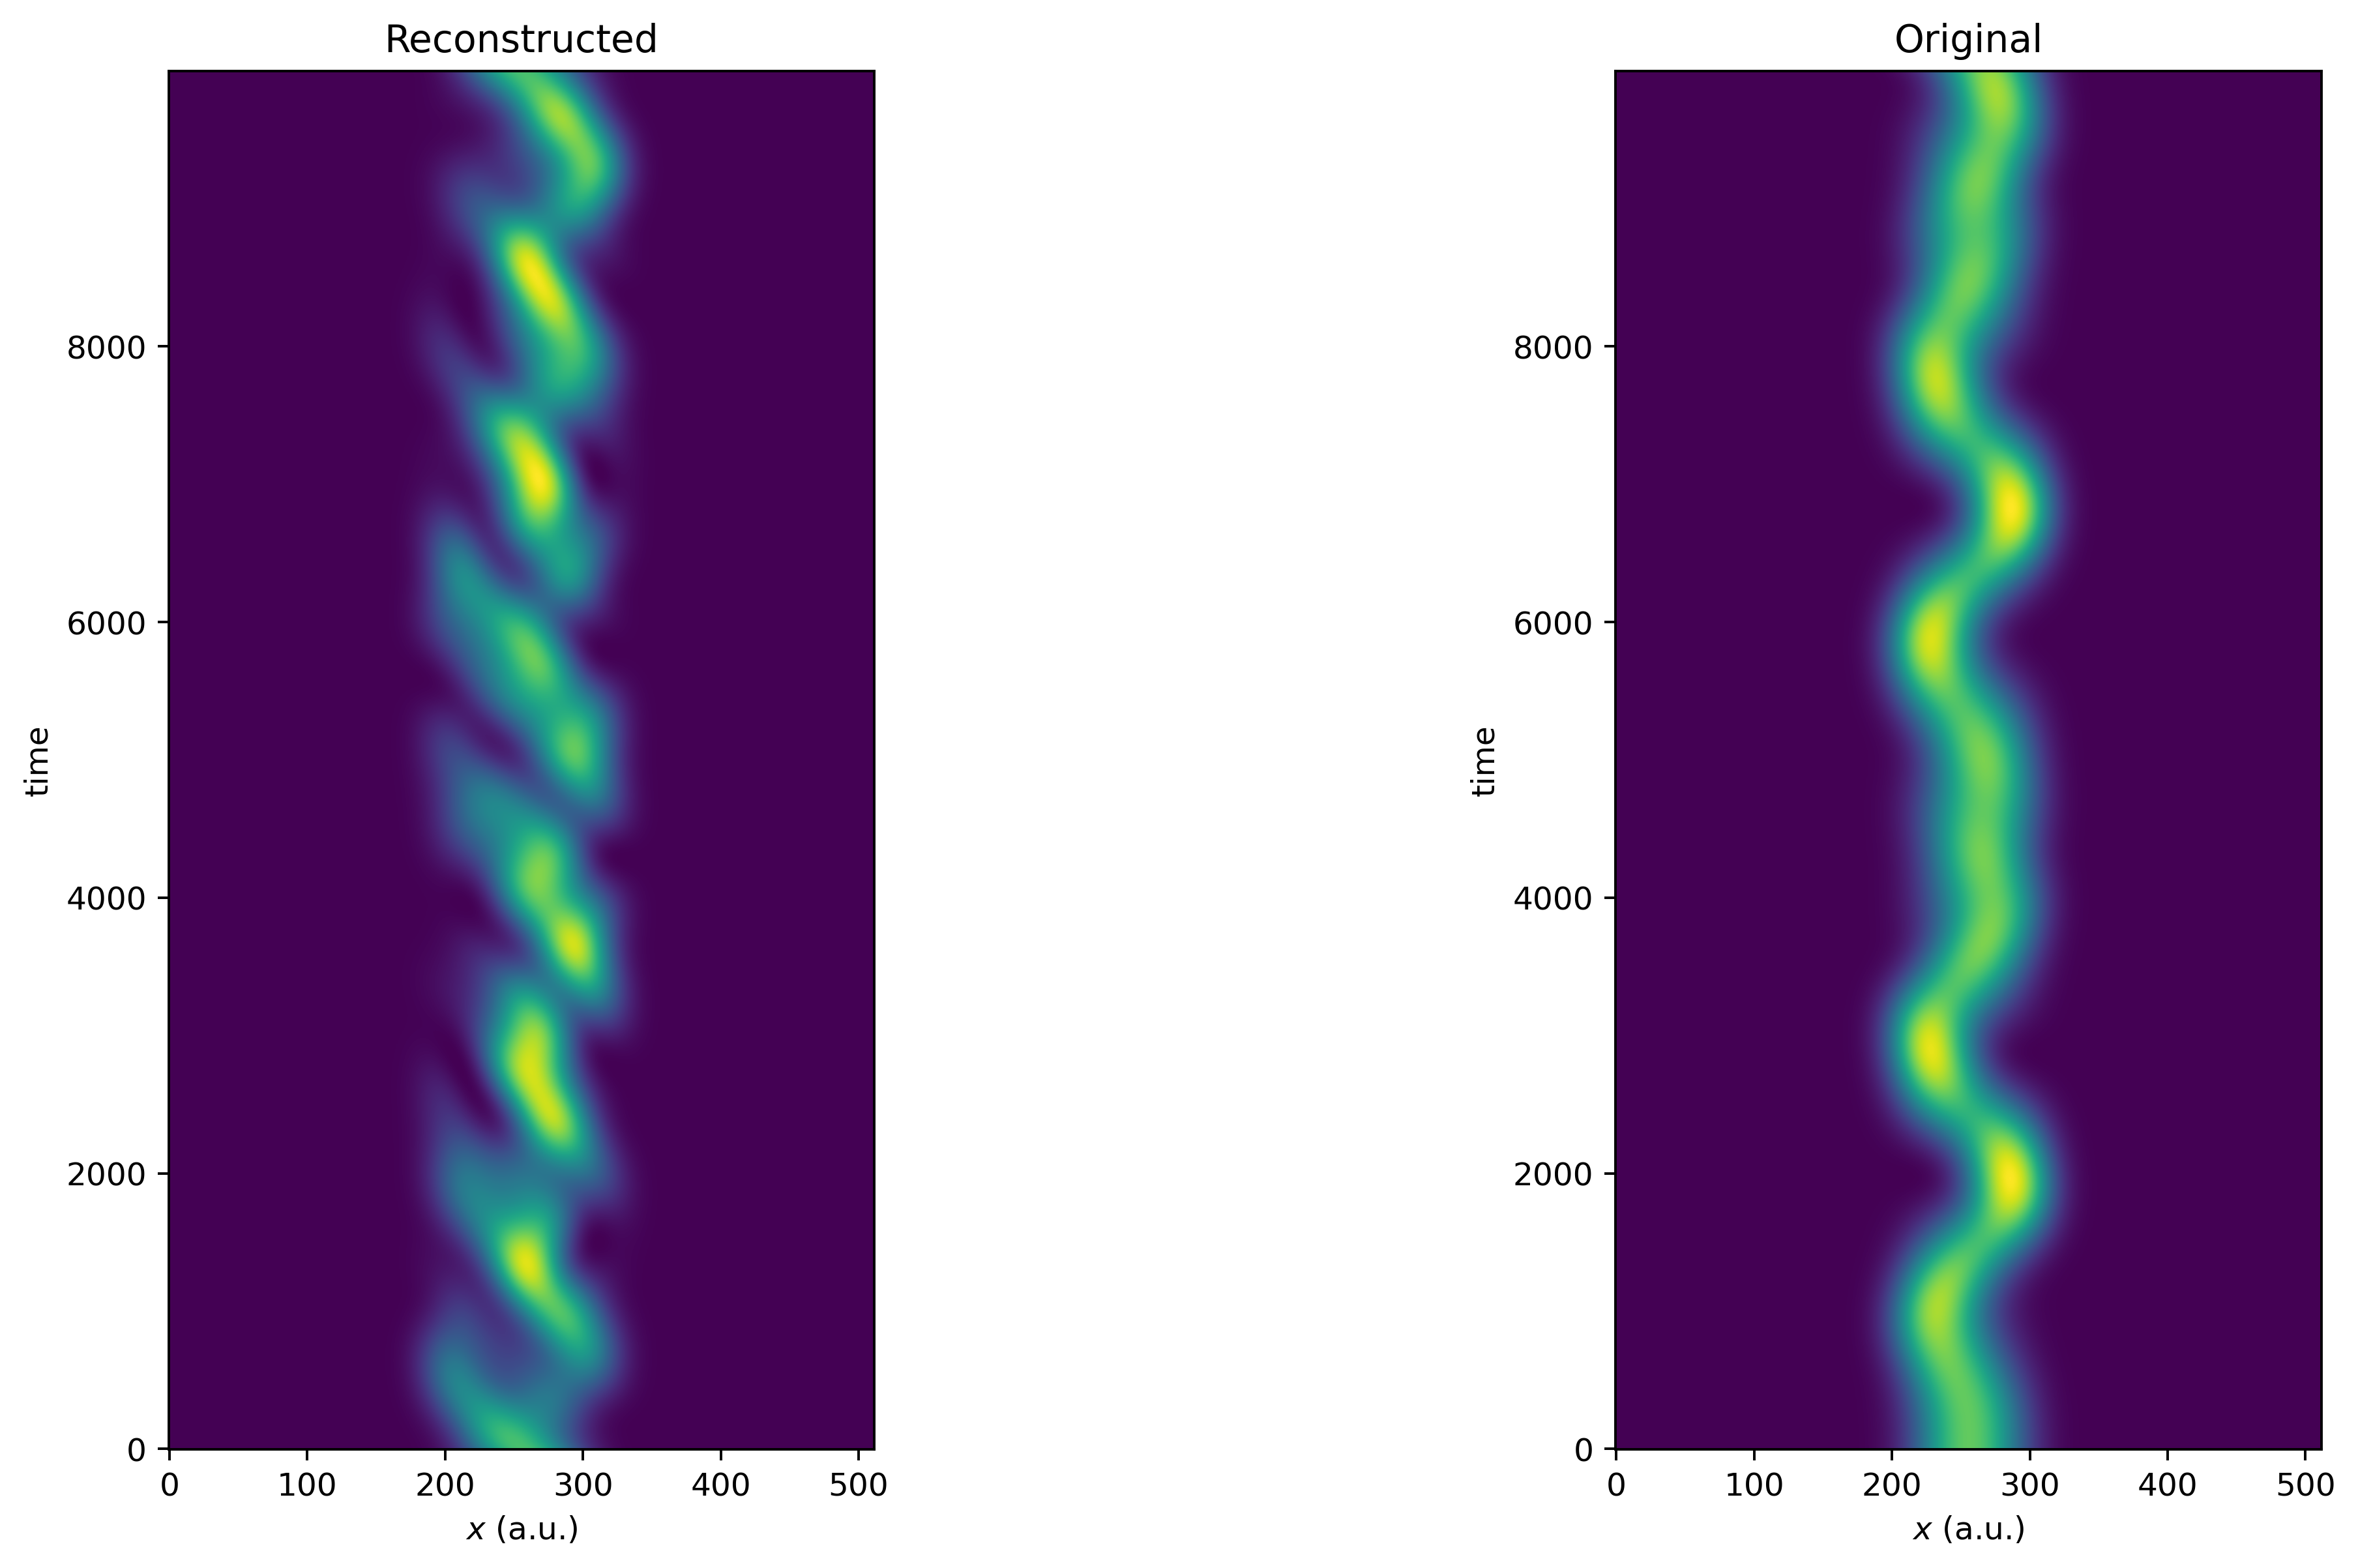

In [26]:
plt.figure(dpi=350)
plt.subplot(121)

plt.title('Reconstructed')
plt.imshow(np.abs(reconstructed_wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.subplot(122)
plt.title('Original')
plt.imshow(np.abs(wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.show()